В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [4]:
import pandas as pd

# Завантаження датасету
df = pd.read_csv("cars.csv")

# Виведення перших 5 записів
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [5]:
import pandas as pd
import numpy as np

# Вивід загальної інформації про типи даних
df.info()

# Визначення числових і категоріальних колонок
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()

# Аналіз унікальних значень у кожній категоріальній колонці
for col in object_cols:
    print(f"\nКолонка: {col}")
    print(f"Кількість унікальних значень: {df[col].nunique()}")
    print(f"Унікальні значення: {df[col].unique()[:10]}")  # Показуємо перші 10

# Класифікація категоріальних колонок
binary_cols = []
multi_nominal = []
multi_ordinal = []  # За замовчуванням порожній, можемо заповнити вручну, якщо знаємо про порядок

for col in object_cols:
    nunique = df[col].nunique()
    if nunique == 2:
        binary_cols.append(col)
    elif nunique > 2:
        multi_nominal.append(col)

# Висновок у форматі шаблону
print(f"\nВ наборі даних {len(numeric_cols)} числових і {len(object_cols)} категоріальних колонок з них:")
print(f"- {len(binary_cols)} бінарні (мають лише 2 значення): {', '.join(binary_cols)}")
print(f"- {len(multi_nominal)} мультикатегоріальні без порядку (номінальні): {', '.join(multi_nominal)}")
print(f"- {len(multi_ordinal)} колонок, в яких можна встановити відношення порядку")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB

Колонка: Brand
Кількість унікальних значень: 11
Унікальні значення: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswag

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [6]:
from sklearn.model_selection import train_test_split

# Визначаємо ознаки (X) та цільову змінну (y)
X = df.drop(columns=["Price"])
y = df["Price"]

# Розділяємо на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12
)

# Перевіримо розміри отриманих наборів
print("Розмір X_train:", X_train.shape)
print("Розмір X_test:", X_test.shape)
print("Розмір y_train:", y_train.shape)
print("Розмір y_test:", y_test.shape)

Розмір X_train: (80, 12)
Розмір X_test: (20, 12)
Розмір y_train: (80,)
Розмір y_test: (20,)


**Що цей код робить:**

drop(columns=["Price"]) — відкидає цільову змінну зі списку ознак;

train_test_split(..., test_size=0.2, random_state=12) — 80% на тренування, 20% на тест;

Виводить розміри отриманих частин, щоб перевірити все.

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [14]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# === 1. Кодуємо бінарні колонки Fuel_Type і Transmission ===
# Визначаємо, яка категорія має більше записів — вона отримає код 1
X_train['Fuel_Type_Code'] = (X_train['Fuel_Type'] == X_train['Fuel_Type'].mode()[0]).astype(int)
X_test['Fuel_Type_Code'] = (X_test['Fuel_Type'] == X_train['Fuel_Type'].mode()[0]).astype(int)

X_train['Transmission_Code'] = (X_train['Transmission'] == X_train['Transmission'].mode()[0]).astype(int)
X_test['Transmission_Code'] = (X_test['Transmission'] == X_train['Transmission'].mode()[0]).astype(int)

# === 2. Кодуємо порядкову колонку Owner_Type ===
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])  # визначаємо порядок
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

# === 3. Кодуємо колонку Brand через OneHotEncoder ===
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(X_train[['Brand']])

brand_train_encoded = pd.DataFrame(
    ohe.transform(X_train[['Brand']]),
    columns=ohe.get_feature_names_out(['Brand']),
    index=X_train.index
)

brand_test_encoded = pd.DataFrame(
    ohe.transform(X_test[['Brand']]),
    columns=ohe.get_feature_names_out(['Brand']),
    index=X_test.index
)

# Додаємо ці колонки до X_train та X_test
X_train = pd.concat([X_train, brand_train_encoded], axis=1)
X_test = pd.concat([X_test, brand_test_encoded], axis=1)

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [16]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Owner_Type_Codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Owner_Type_Codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

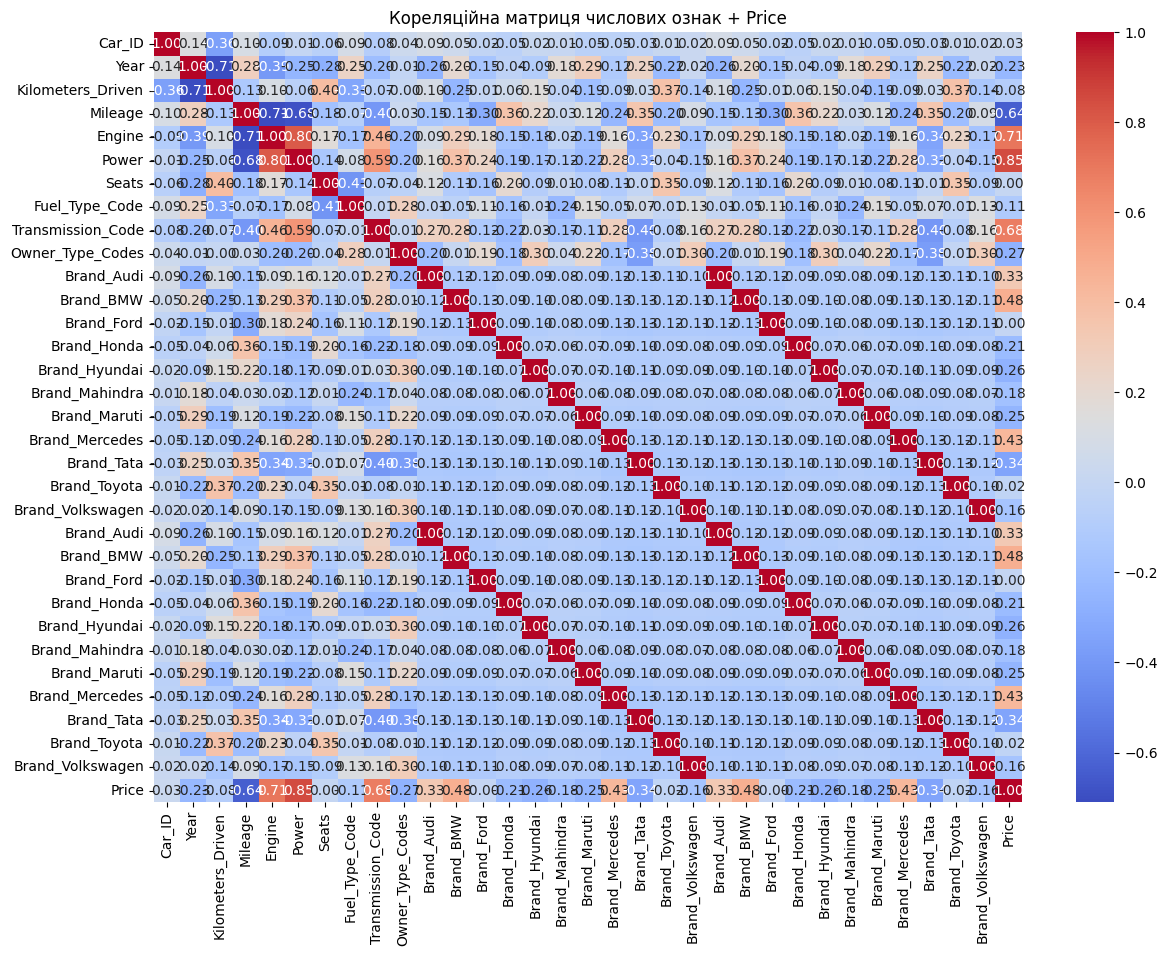


📌 Ознаки, що сильно корелюють з ціною (|коеф| > 0.5):
Power                0.849137
Engine               0.710561
Transmission_Code    0.680731
Mileage             -0.638404
Name: Price, dtype: float64


In [17]:
# 📌 Завдання 5: Аналіз кореляцій між числовими ознаками і Price

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Вибір тільки числових колонок
X_train_numeric = X_train.select_dtypes(include='number')

# 2. Об'єднання з цільовою змінною y_train
train_with_target = pd.concat([X_train_numeric, y_train], axis=1)

# 3. Побудова кореляційної матриці
corr_matrix = train_with_target.corr(numeric_only=True)

# 4. Візуалізація теплової карти
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляційна матриця числових ознак + Price")
plt.show()

# 5. Виведення сильних кореляцій з Price (> 0.5 або < -0.5)
target_corr = corr_matrix['Price'].drop('Price')
strong_corr = target_corr[abs(target_corr) > 0.5].sort_values(ascending=False)

print("\n📌 Ознаки, що сильно корелюють з ціною (|коеф| > 0.5):")
print(strong_corr)

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

✅ RMSE на тренувальних даних: 210293.58
✅ RMSE на тестових даних: 258181.56


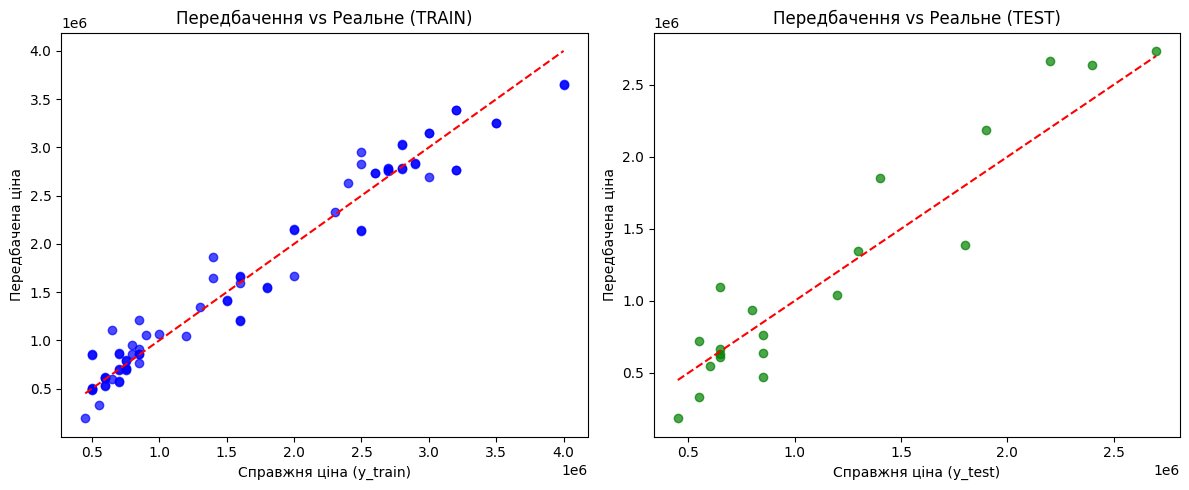

In [18]:
# 📌 Завдання 6: Лінійна регресія

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Видаляємо НЕчислові колонки з X_train і X_test
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

# 2. Навчаємо модель лінійної регресії
lr = LinearRegression()
lr.fit(X_train_num, y_train)

# 3. Робимо передбачення
y_train_pred = lr.predict(X_train_num)
y_test_pred = lr.predict(X_test_num)

# 4. Обчислюємо RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"✅ RMSE на тренувальних даних: {rmse_train:.2f}")
print(f"✅ RMSE на тестових даних: {rmse_test:.2f}")

# 5. Побудова графіків: передбачення vs реальні значення
plt.figure(figsize=(12, 5))

# Графік для TRAIN
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.xlabel("Справжня ціна (y_train)")
plt.ylabel("Передбачена ціна")
plt.title("Передбачення vs Реальне (TRAIN)")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')

# Графік для TEST
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green')
plt.xlabel("Справжня ціна (y_test)")
plt.ylabel("Передбачена ціна")
plt.title("Передбачення vs Реальне (TEST)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.tight_layout()
plt.show()

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

✅ Найвпливовіші змінні (за абсолютним значенням коефіцієнтів):
Power                496769.214899
Fuel_Type_Code      -183848.018909
Mileage             -131715.512030
Transmission_Code    116693.768206
Brand_Mercedes       105024.390574
Brand_Mercedes       105024.390574
Brand_BMW            104203.656891
Brand_BMW            104203.656891
Brand_Audi           102800.073884
Brand_Audi           102800.073884
Kilometers_Driven    -94398.721486
Brand_Hyundai        -76152.431956
Brand_Hyundai        -76152.431956
Brand_Mahindra       -70472.581452
Brand_Mahindra       -70472.581452
Brand_Ford           -59104.725155
Brand_Ford           -59104.725155
Brand_Maruti         -56129.983510
Brand_Maruti         -56129.983510
Brand_Volkswagen     -46484.130033
Brand_Volkswagen     -46484.130033
Owner_Type_Codes      42344.952815
Brand_Tata           -32998.123486
Brand_Tata           -32998.123486
Brand_Honda          -31376.502693
Brand_Honda          -31376.502693
Engine               -21377

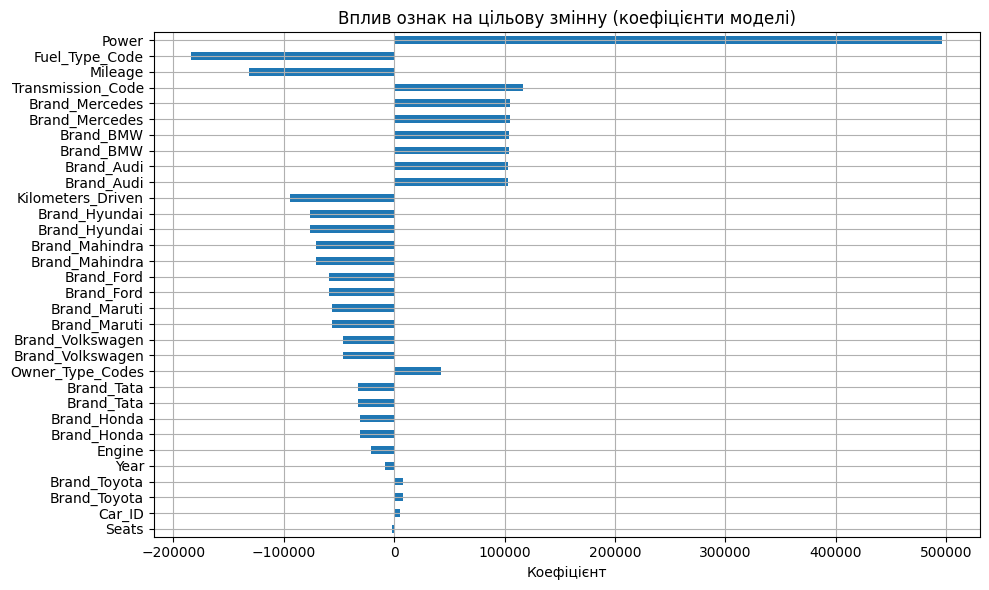

In [19]:
# 📌 Завдання 7: Масштабування + аналіз коефіцієнтів

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# 1. Знову обираємо тільки числові ознаки
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

# 2. Масштабуємо дані
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# 3. Навчаємо лінійну регресію на відмасштабованих даних
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# 4. Переглядаємо коефіцієнти
coefficients = pd.Series(lr_scaled.coef_, index=X_train_num.columns).sort_values(key=np.abs, ascending=False)

print("✅ Найвпливовіші змінні (за абсолютним значенням коефіцієнтів):")
print(coefficients)

# 5. Візуалізація впливу
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.title("Вплив ознак на цільову змінну (коефіцієнти моделі)")
plt.xlabel("Коефіцієнт")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [21]:
import statsmodels.api as sm
import pandas as pd

# 1. Створюємо DataFrame з відмасштабованих даних з правильним індексом
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include='number').columns, index=y_train.index)

# 2. Додаємо константу (intercept)
X_train_scaled_df = sm.add_constant(X_train_scaled_df)

# 3. Тренуємо модель
model = sm.OLS(y_train, X_train_scaled_df).fit()

# 4. Виводимо повний звіт
print(model.summary())

# 5. Ознаки з p-value < 0.05
significant_features = model.pvalues[model.pvalues < 0.05]
significant_features = significant_features.drop('const', errors='ignore')

print("\n✅ Статистично значущі ознаки (p < 0.05):")
print(significant_features.index.tolist())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        20:55:15   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [22]:
import statsmodels.api as sm

# 1. Фільтруємо тільки статистично значущі ознаки (завдання 8 вже їх визначило)
# Якщо ти зберіг список як `significant_features`, то він містить індекси названих колонок
selected_columns = significant_features.index.tolist()

# 2. Створюємо новий DataFrame тільки з цих колонок
X_train_significant = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include='number').columns, index=y_train.index)
X_train_significant = X_train_significant[selected_columns]

# 3. Додаємо константу
X_train_significant = sm.add_constant(X_train_significant)

# 4. Будуємо модель
model_significant = sm.OLS(y_train, X_train_significant).fit()

# 5. Виводимо звіт
print(model_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        20:55:43   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

🔍 Висновок:

R-squared і Adj. R-squared майже не змінились після того, як модель була побудована тільки на статистично значущих ознаках (p-value < 0.05). Це означає, що модель з меншою кількістю ознак є так само ефективною, як і повна модель.

📌 Тобто:

Простішу модель краще використовувати — вона менш схильна до перенавчання;

Видалення незначущих змінних не погіршило якість передбачення, а зробило модель більш інтерпретованою.

✅ Висновок: зміни в R² і Adj. R² не є суттєвими → модель із відібраними ознаками рекомендована.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [23]:
# 1. Вибираємо ознаки з p-value < 0.25 (з моделі завдання 8)
moderately_significant = model.pvalues[model.pvalues < 0.25].drop('const', errors='ignore')
selected_columns_025 = moderately_significant.index.tolist()

# 2. Створюємо DataFrame тільки з цих колонок
X_train_025 = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include='number').columns, index=y_train.index)
X_train_025 = X_train_025[selected_columns_025]

# 3. Додаємо константу
X_train_025 = sm.add_constant(X_train_025)

# 4. Тренуємо модель
model_025 = sm.OLS(y_train, X_train_025).fit()

# 5. Виводимо звіт
print(model_025.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        20:57:22   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0